# Analyzing Video Game Sales, by Andy Qu and Evan Song

Tutorial by Andy Qu and Evan Song

# Why analyze Video Game Sales?
PLACEHOLDER


Will analyze Video Games and how the Publisher and the number of Games Produced by the Publisher affects the quality and reception of the games made.

# Gathering Data

PLACEHOLDER

Uses Video Game Data from Kaggle: https://www.kaggle.com/ashaheedq/video-games-sales-2019

Uses Video Game Region Data from Kaggle: https://www.kaggle.com/andreshg/videogamescompaniesregions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns; sns.set_theme()

df = pd.read_csv('vgsales-12-4-2019.csv')
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


In [2]:
region_df = pd.read_csv("video-games-developers.csv")
region_df.head()

,Developer,City,Administrative division,Country,Est.,"Notable games, series or franchises",Notes
0,0verflow,Tokyo,NaN,Japan,1997,School DaysSummer DaysCross Days,Visual Novel brand (both developer and publisher)
1,11 bit studios,Warsaw,Masovian Voivodeship,Poland,2010,Frostpunk,Indie developer/publisher
2,1C Company,Moscow,NaN,Russia,1991,King's Bounty: Warriors of the North,Game localization. The game development subsid...
3,1-Up Studio,Tokyo,NaN,Japan,2000,Mother 3,Subsidiary of Nintendo. Formed by former emplo...
4,2K Czech,Brno,NaN,Czech Republic,1997,MafiaMafia II,Former subsidiary of 2K Games; previously know...


In [3]:
df = pd.merge(df, region_df[['Developer', 'Country']], left_on='Publisher', right_on='Developer', how='left')
df = df.drop(['Developer_y','NA_Sales','PAL_Sales','JP_Sales','Other_Sales'], axis=1)
df.columns = ['Rank','Name','Genre','ESRB_Rating','Platform','Publisher','Developer',
              'Critic_Score','User_Score','Total_Shipped','Global_Sales','Year','Country']
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,Year,Country
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,2006.0,Japan
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,1985.0,Japan
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,2008.0,Japan
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,2017.0,NaN
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,2009.0,Japan


Description of columns
- Rank - Games ranked by sales
- Name - Name of the game
- Genre - Genre of the game
- ESRB_Rating - ESRB Rating of game
- Platform - Platform of the game
- Publisher - Publisher of Game
- Developer - Developer of Game
- Critic_Score - Critic Score of the game out of 10
- User_Score - User Score of the game out of 10
- Total_Shipped - Total game sales (in millions)
- Global_Sales - Total game sales  (in millions)
- Year - Year game published
- Country - Country of Publisher

# Exploratory Data Analysis
PLACEHOLDER

Remove all rows that have no sale information since this dataset analyzes sales.

Create new columns for total sales per publisher, average sale per game for publisher, and how many games a publisher has published.

New columns made:
- Total_Sales - Stores the total sales of "Total_Shipped" and "Global_Sales" in one column.
- Publisher_Sales - Stores the total sales of each publisher
- Games_Produced - The total number of games produced by each publisher
- Avg_Sale - The average sale per game. Calculated with df.Publisher_Sale/df.Games_Produced

In [4]:
# Because sales are either listed under "Total_Shipped" or "Global_Sales", 
# Total_Sales will keep the total value in one column. Records by Millions.
# Then removes games with no sales data whatsoever.
df['Total_Sales'] = df.Total_Shipped.fillna(0) + df.Global_Sales.fillna(0)
df = df[df.Total_Sales != 0]
df = df.drop(['Total_Shipped','Global_Sales',], axis=1)

# Publisher sales 
df["Publisher_Sales"] = df.groupby(["Publisher"])["Total_Sales"].transform(sum)
df = df.sort_values(by=['Publisher_Sales', 'Total_Sales'], ascending=False)

# Games Produced and Average Sale per publisher per game
df['Games_Produced'] = df.groupby(['Publisher'])['Publisher_Sales'].transform('count')
df['Avg_Sale'] = df.Publisher_Sales / df.Games_Produced

In [5]:
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Country,Total_Sales,Publisher_Sales,Games_Produced,Avg_Sale
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,Japan,82.86,1988.48,753,2.640744
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0,Japan,40.24,1988.48,753,2.640744
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,Japan,37.14,1988.48,753,2.640744
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,Japan,33.09,1988.48,753,2.640744
5,6,Pokemon Red / Green / Blue Version,Role-Playing,E,GB,Nintendo,Game Freak,9.4,NaN,1998.0,Japan,31.38,1988.48,753,2.640744


# ESRB and Genre vs Sales

In [6]:
# ESRB Rating DataFrame, removes NaN rows
ESRB_df = df.dropna(subset=['ESRB_Rating'])
ESRB_df = ESRB_df[ESRB_df.Name != 'Wii Sports']

In [8]:
X = ESRB_df['Genre']
X = np.sort(X.values.flatten())
X2 = ESRB_df['ESRB_Rating']
Y = ESRB_df['Total_Sales']

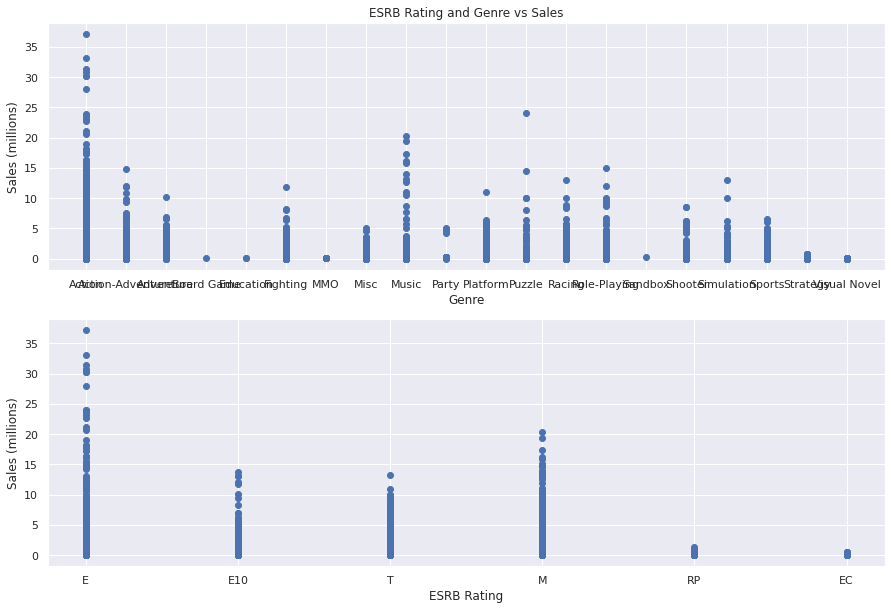

In [10]:
fig, axes = plt.subplots(2, figsize=(15, 10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.set_title("ESRB Rating and Genre vs Sales")
ax1.set_ylabel("Sales (millions)")
ax1.set_xlabel("Genre")
ax2.set_ylabel("Sales (millions)")
ax2.set_xlabel("ESRB Rating")
ax1.scatter(X, Y)
ax2.scatter(X2, Y)

# Year vs Sales

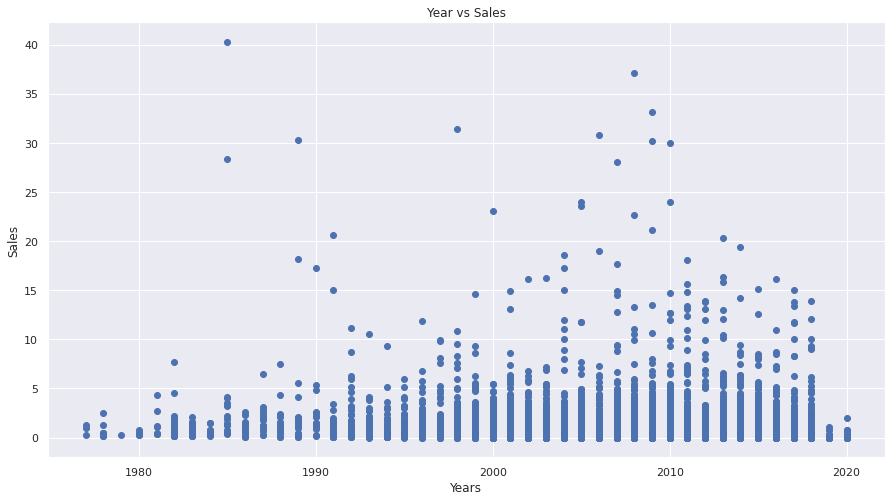

In [26]:
year_df = df.dropna(subset=['Year'])
year_df = year_df[year_df.Name != 'Wii Sports']
year_df = year_df[year_df.Publisher != 'PUBG Corporation']
year_df = year_df[year_df.Year != 1970]

X = year_df['Year']
Y = year_df['Total_Sales']
plt.figure(figsize=(15, 8))
plt.title("Year vs Sales")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.scatter(X, Y)

Text(0.5, 1.0, 'Violin Sales by Year')

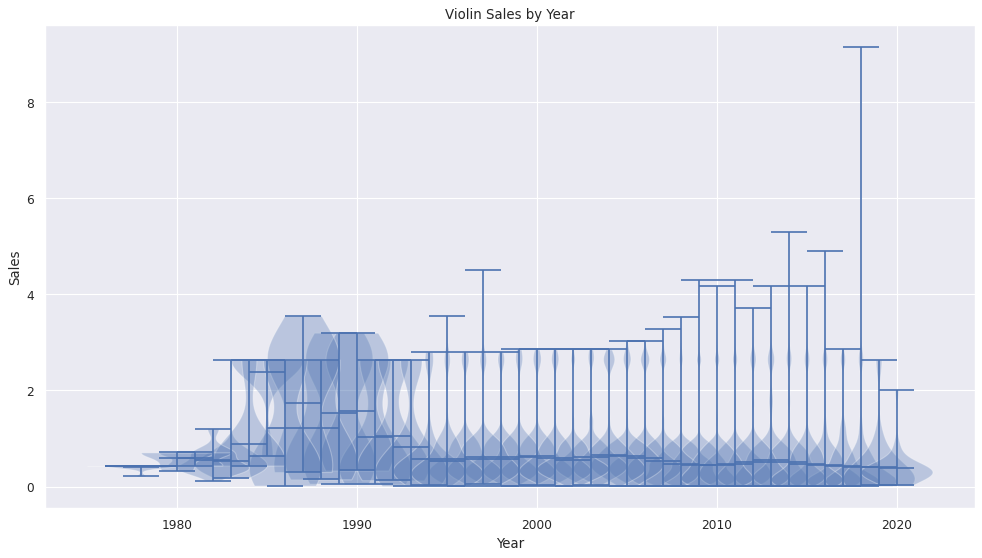

In [28]:
year_list = year_df.Year.unique()
violin_exp = []

for i in year_list:
    violin_exp.append(year_df[year_df['Year'] == i]['Avg_Sale'].to_numpy())
    
plt.figure(figsize=(15, 8), dpi=80)
plt.violinplot(violin_exp, year_list, widths=4, showmeans=True) 
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Violin Sales by Year")

In [25]:
uniq = year_df[year_df['Year'] == 1970]
len(year_df)

19857